In [3]:
from forge.core.database import DatabaseManager
import json

In [6]:
db = DatabaseManager()

In [5]:
bad_ids = json.load(open('bad_structure_ids.json'))
rare_ids = json.load(open('rare_structure_ids.json'))

In [7]:

bad_metadata = db.get_structure_metadata_batch(bad_ids)
rare_metadata = db.get_structure_metadata_batch(rare_ids)

In [10]:
print(bad_metadata)

{433: {'batch_id': 9, 'generation': 2, 'composition': True, 'config_type': 'neb_aa-mc', 'source_path': 'V-Cr-Ti-W-Zr/Fixed_Engrads/vcrtiwzr_fin_engrads/job_gen_2-2024-11-10_selected_fin/batch_9/structure_24_neb_adversarial_2251', 'temperature': True, 'date_processed': '2025-01-03T17:27:57.550943', 'structure_type': 'neb', 'structure_index': 24, 'adversarial_step': True}, 15769: {'batch_id': True, 'generation': 0, 'composition': True, 'config_type': 'neb', 'source_path': 'V-Cr-Ti-W-Zr/Fixed_Engrads/vcrtiwzr_fin_engrads/job_gen_0-2024-11-01/neb_43/structure_8040', 'temperature': True, 'date_processed': '2025-01-03T17:54:28.309586', 'structure_type': 'neb', 'structure_index': 8040, 'adversarial_step': True}, 28973: {'loss': 1.1556705236434937, 'step': 121, 'variance': 1.1556705236434937, 'parent_id': 21644, 'generation': 8, 'composition': 'W55', 'config_type': 'short_range_aa', 'source_path': 'V-Cr-Ti-W-Zr/Fixed_Engrads/vcrtiwzr_fin_engrads/job_gen_6-2024-12-23/W/W55_short_range_idx_3650'

In [11]:
# I want to get all the unique config_type for both bad and rare structures 
# both are in lists of dictionaries 

bad_config_types = set()
rare_config_types = set()

for structure_id, metadata in bad_metadata.items():
    bad_config_types.add(metadata['config_type'])

for structure_id, metadata in rare_metadata.items():
    rare_config_types.add(metadata['config_type'])

print(bad_config_types)
print(rare_config_types)

{'neb', 'liquid_aa', 'neb_aa-mc', 'short_range_aa', 'phonon_aa'}
{'sia', 'comp-explore', 'tri-vacancy', 'liquid_aa', 'C15', 'neb_aa-mc', 'di-sia', 'short_range_aa', 'vac_aa-mc', 'vacancy-alloy', 'neb', 'phonon_aa'}


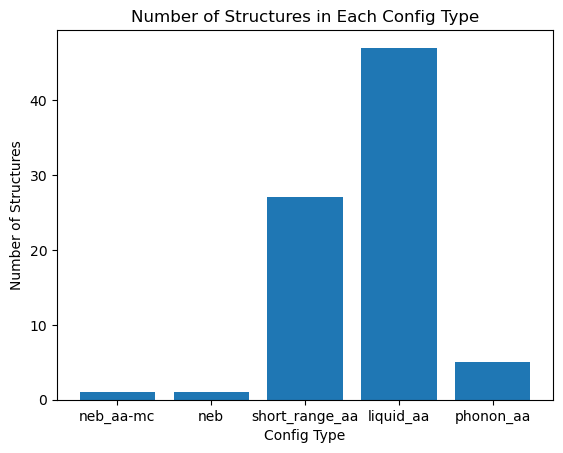

In [12]:
# make a histogram of the number of structures in each config_type

import matplotlib.pyplot as plt

# Count the number of structures in each config_type
config_type_counts = {}
for metadata in bad_metadata.values():
    config_type = metadata['config_type']
    config_type_counts[config_type] = config_type_counts.get(config_type, 0) + 1

# Plot the histogram
plt.bar(config_type_counts.keys(), config_type_counts.values())
plt.xlabel('Config Type')
plt.ylabel('Number of Structures')
plt.title('Number of Structures in Each Config Type')
plt.show()

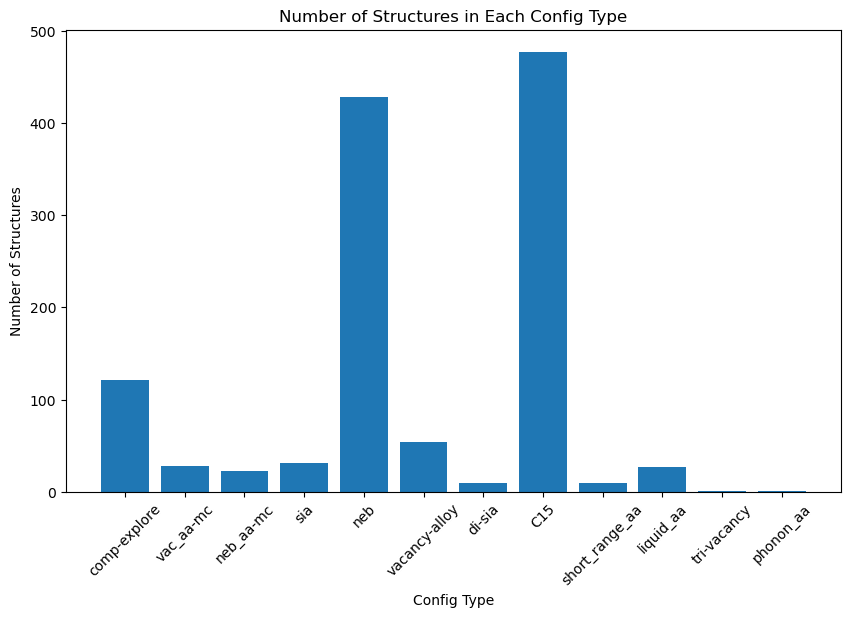

In [15]:
# do the same for rare structures 

# Count the number of structures in each config_type
config_type_counts = {}
for metadata in rare_metadata.values():
    config_type = metadata['config_type']
    config_type_counts[config_type] = config_type_counts.get(config_type, 0) + 1

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(config_type_counts.keys(), config_type_counts.values())
plt.xlabel('Config Type')
plt.ylabel('Number of Structures')
plt.title('Number of Structures in Each Config Type')
plt.xticks(rotation=45)
plt.show()